**<h1>Defaulter Prediction**


**Content**

There are 24 variables:


LIMIT_BAL: Amount of given credit in dollars 
   
Gender: (1=male, 2=female)

EDUCATION: (1=university,2=graduate school,3=high school,4=Graduate_Int,5=PG_Int,6=NoEdu,7=PG)
    

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in January (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in February (scale same as above)

PAY_3: Repayment status in March (scale same as above)

PAY_4: Repayment status in April (scale same as above)

PAY_5: Repayment status in May (scale same as above)

PAY_6: Repayment status in June (scale same as above)

BILL_AMT1: Amount of bill statement in January (dollar)

BILL_AMT2: Amount of bill statement in February (dollar)

BILL_AMT3: Amount of bill statement in March (dollar)

BILL_AMT4: Amount of bill statement in April (dollar)

BILL_AMT5: Amount of bill statement in May (dollar)

BILL_AMT6: Amount of bill statement in June (dollar)

PAY_AMT1: Amount of previous payment in January (dollar)

PAY_AMT2: Amount of previous payment in February (dollar)

PAY_AMT3: Amount of previous payment in March (dollar)

PAY_AMT4: Amount of previous payment in April (dollar)

PAY_AMT5: Amount of previous payment in May (dollar)

PAY_AMT6: Amount of previous payment in June (dollar)

default payment next month: Default payment (1=yes, 0=no)

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from graphviz import Source
import pydotplus

In [632]:
df=pd.read_csv(r'CaseStudy_FraudIdentification.csv',header=0)

In [633]:
df.head()

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,university,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,university,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,university,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [634]:
df.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [635]:
# The output variable is having 1 or 0
df['default payment next month'].unique()


array([1, 0], dtype=int64)

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   Gender                      30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [637]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [638]:
df.isnull().sum()

LIMIT_BAL                     0
Gender                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [639]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

<h2>Exploratory Data Analysis

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

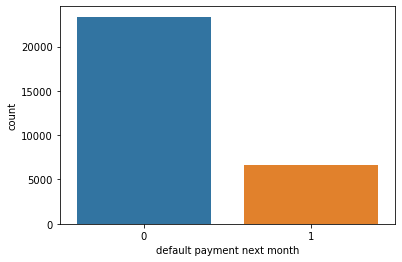

In [640]:
sns.countplot(df['default payment next month'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

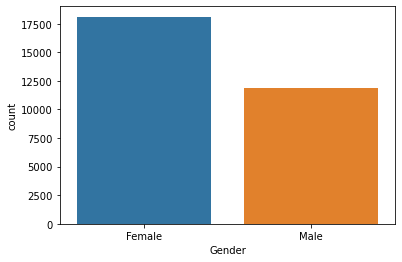

In [641]:
sns.countplot(df['Gender'])

In [642]:
#sns.countplot(df['EDUCATION'])
df['EDUCATION'].unique()

array(['university', 'graduate school', 'high school', 'Graduate_Int',
       'PG_Int', 'NoEdu', 'PG'], dtype=object)

In [643]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
Graduate_Int         280
PG_Int               123
NoEdu                 51
PG                    14
Name: EDUCATION, dtype: int64

In [644]:
df['MARRIAGE'].unique()

array(['Married', 'single', 'others', '0'], dtype=object)

In [645]:
df['MARRIAGE'].value_counts()

single     15964
Married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

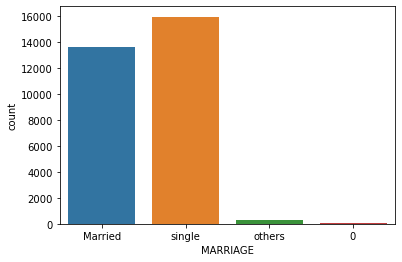

In [646]:
sns.countplot(df['MARRIAGE'])

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

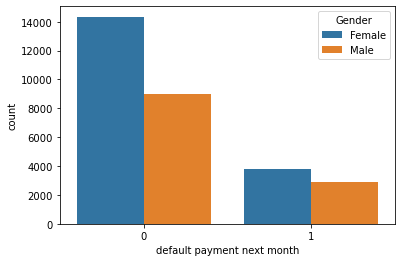

In [647]:
sns.countplot(df['default payment next month'],hue=df['Gender'])

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

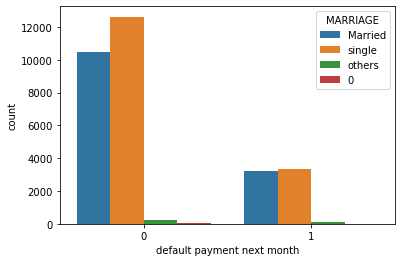

In [648]:
sns.countplot(df['default payment next month'],hue=df['MARRIAGE'])

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

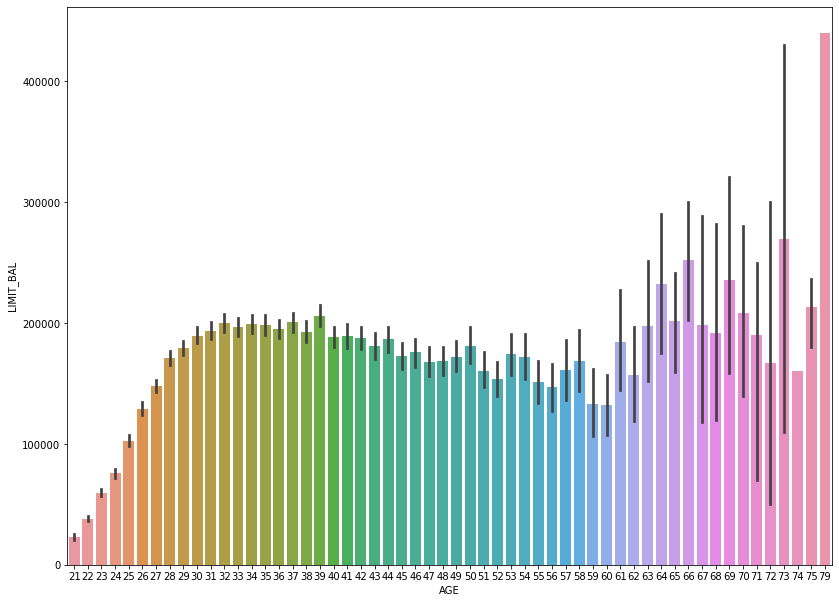

In [649]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.barplot(df['AGE'],df['LIMIT_BAL'])

In [650]:
#Credit amount increased rapidly from age 21 to 32, it remain constant till 60, and again increased till 79 years

<h2>Distribution Plot

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

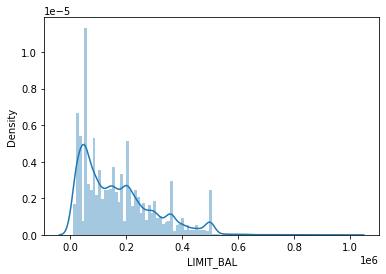

In [651]:
sns.distplot(df['LIMIT_BAL'],bins=100)

In [652]:
df.corr()['default payment next month']

LIMIT_BAL                    -0.153520
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

<AxesSubplot:>

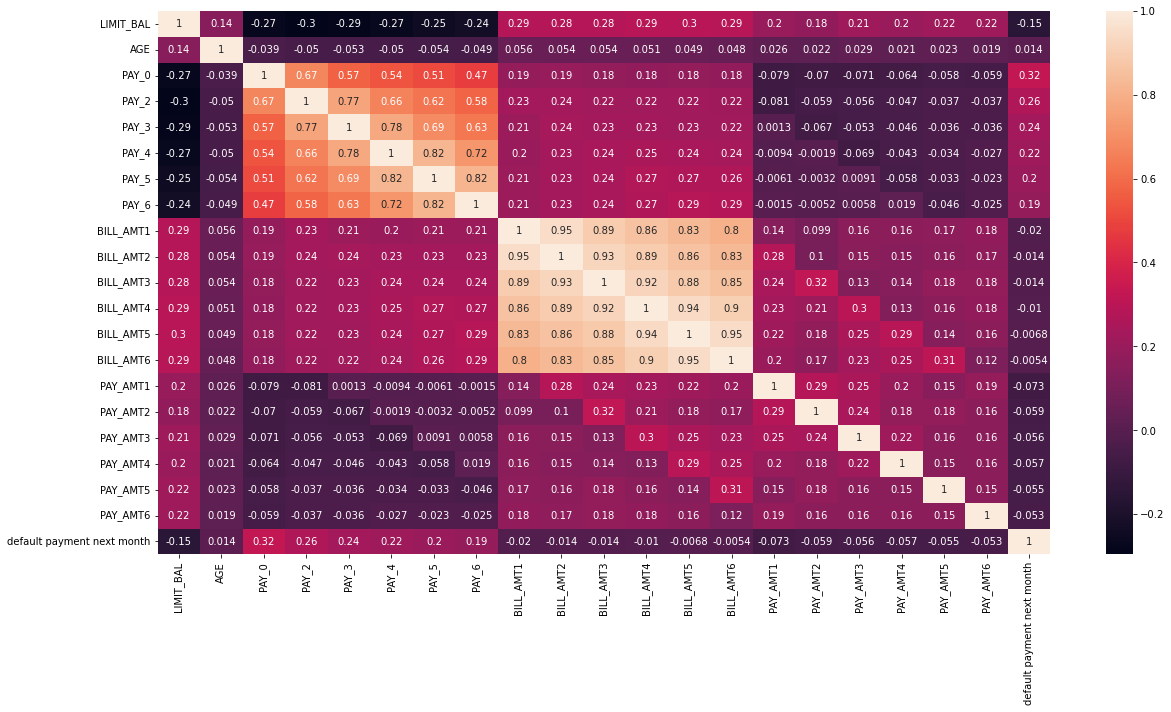

In [653]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [654]:
X=df.drop('default payment next month',axis=1)
Y=df['default payment next month']

<AxesSubplot:title={'center':'Correlation_With_Response_Variable'}>

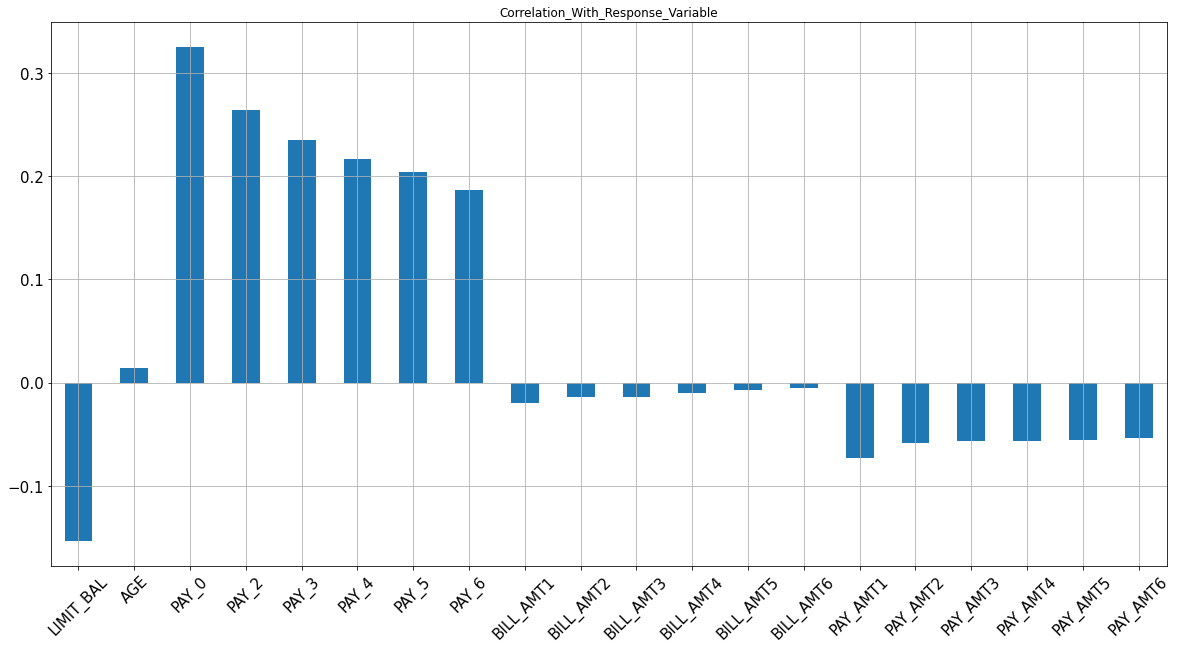

In [655]:
X.corrwith(Y).plot.bar(figsize=(20,10),title="Correlation_With_Response_Variable",fontsize=15,rot=45, grid=True)

<h2>Data Cleaning and Feature Engineering

<h2>Checking Duplicate Values

In [656]:
df.shape

(30000, 24)

In [657]:
df.duplicated().sum()

35

In [658]:
#There are 35 Duplicate entries in the data set

In [659]:
df.drop_duplicates(keep='first',inplace=True)

In [660]:
df.shape

(29965, 24)

<h2>Mean Encoding of Categorical Variables

In [661]:
# We are having three categorical Variables (Education, Marraige, Gendar)

df['EDUCATION'].value_counts()

university         14019
graduate school    10563
high school         4915
Graduate_Int         280
PG_Int               123
NoEdu                 51
PG                    14
Name: EDUCATION, dtype: int64

In [662]:
Mean_encoded_education = df.groupby(['EDUCATION'])['default payment next month'].mean().to_dict()
  
df['EDUCATION'] =  df['EDUCATION'].map(Mean_encoded_education)

In [663]:
df['MARRIAGE'].unique()

array(['Married', 'single', 'others', '0'], dtype=object)

In [664]:
df['MARRIAGE'].value_counts()

single     15945
Married    13643
others       323
0             54
Name: MARRIAGE, dtype: int64

In [665]:
df.drop(df[df.MARRIAGE=='0'].index, inplace=True)

In [666]:
df['MARRIAGE'].value_counts()

single     15945
Married    13643
others       323
Name: MARRIAGE, dtype: int64

In [667]:
Mean_encoded_marriage = df.groupby(['MARRIAGE'])['default payment next month'].mean().to_dict()
  
df['MARRIAGE'] =  df['MARRIAGE'].map(Mean_encoded_marriage)

In [668]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [669]:
df['Gender'].value_counts()

Female    18051
Male      11860
Name: Gender, dtype: int64

In [670]:
Mean_encoded_gender = df.groupby(['Gender'])['default payment next month'].mean().to_dict()
  
df['Gender'] =  df['Gender'].map(Mean_encoded_gender)

In [671]:
df.head(5)

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,0.208188,0.237392,0.234626,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0.208188,0.237392,0.209470,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0.208188,0.237392,0.209470,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0.208188,0.237392,0.234626,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,0.241737,0.237392,0.234626,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [672]:
df.dtypes

LIMIT_BAL                       int64
Gender                        float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
dtype: object

<h2>Checking Co-relation

In [674]:
X=df.drop('default payment next month',axis=1)
Y=df['default payment next month']

<AxesSubplot:title={'center':'Correlation_With_Response_Variable'}>

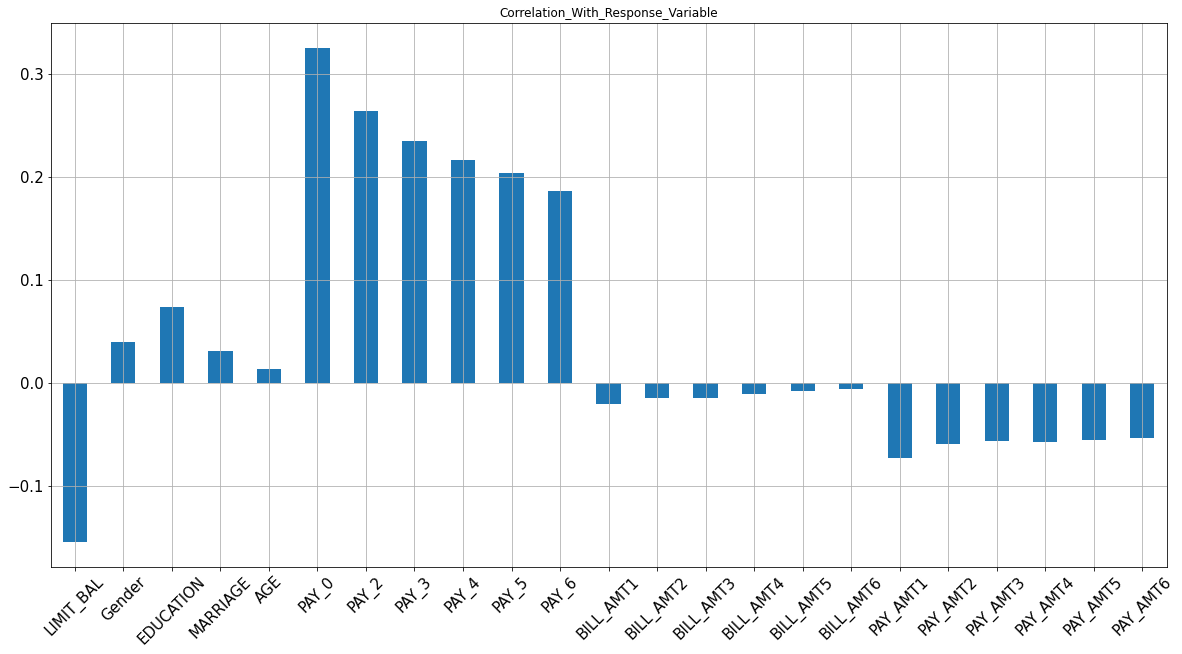

In [675]:
X.corrwith(Y).plot.bar(figsize=(20,10),title="Correlation_With_Response_Variable",fontsize=15,rot=45, grid=True)

## Testing For Multicollinearity

In [676]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [677]:
df_features=df.drop('default payment next month',axis=1)
df_features.head(10)

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0.208188,0.237392,0.234626,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0.208188,0.237392,0.209470,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0.208188,0.237392,0.209470,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0.208188,0.237392,0.234626,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,0.241737,0.237392,0.234626,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,0.241737,0.192370,0.209470,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,500000,0.241737,0.192370,0.209470,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,100000,0.208188,0.237392,0.209470,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
8,140000,0.208188,0.251679,0.234626,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,20000,0.241737,0.251679,0.209470,35,-2,-2,-2,-2,-1,...,0,0,13007,13912,0,0,0,13007,1122,0


In [678]:
vif=[]
for i in range(df_features.shape[1]):
    vif.append(variance_inflation_factor(exog=df_features.values, exog_idx=i))
print(vif)

[4.046506165048121, 113.66405648296892, 54.468934995935086, 166.8922465824167, 19.21951314865719, 1.926399233147816, 3.206257689754168, 3.716589623453542, 4.4265818423943, 4.96646120016704, 3.450192934016466, 20.806046673012023, 38.2185389380703, 31.79326228687328, 29.542999078600705, 35.982026302829006, 21.442514043930096, 1.9058011957054275, 2.3855312153697628, 1.9115844727808298, 1.8047392977315362, 1.8545710143650507, 1.2707809925800921]


In [679]:
pd.DataFrame({'coef_name':df_features.columns,
               'vif':np.around(vif,2)})

,coef_name,vif
0,LIMIT_BAL,4.05
1,Gender,113.66
2,EDUCATION,54.47
3,MARRIAGE,166.89
4,AGE,19.22
5,PAY_0,1.93
6,PAY_2,3.21
7,PAY_3,3.72
8,PAY_4,4.43
9,PAY_5,4.97


In [680]:
#There is a multicolinearing betweeen couple of variables.
#Droping columns ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
df.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1, inplace=True)
df.head(5)

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,0.208188,0.237392,0.234626,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
1,120000,0.208188,0.237392,0.209470,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,0.208188,0.237392,0.209470,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,50000,0.208188,0.237392,0.234626,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,50000,0.241737,0.237392,0.234626,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


<AxesSubplot:>

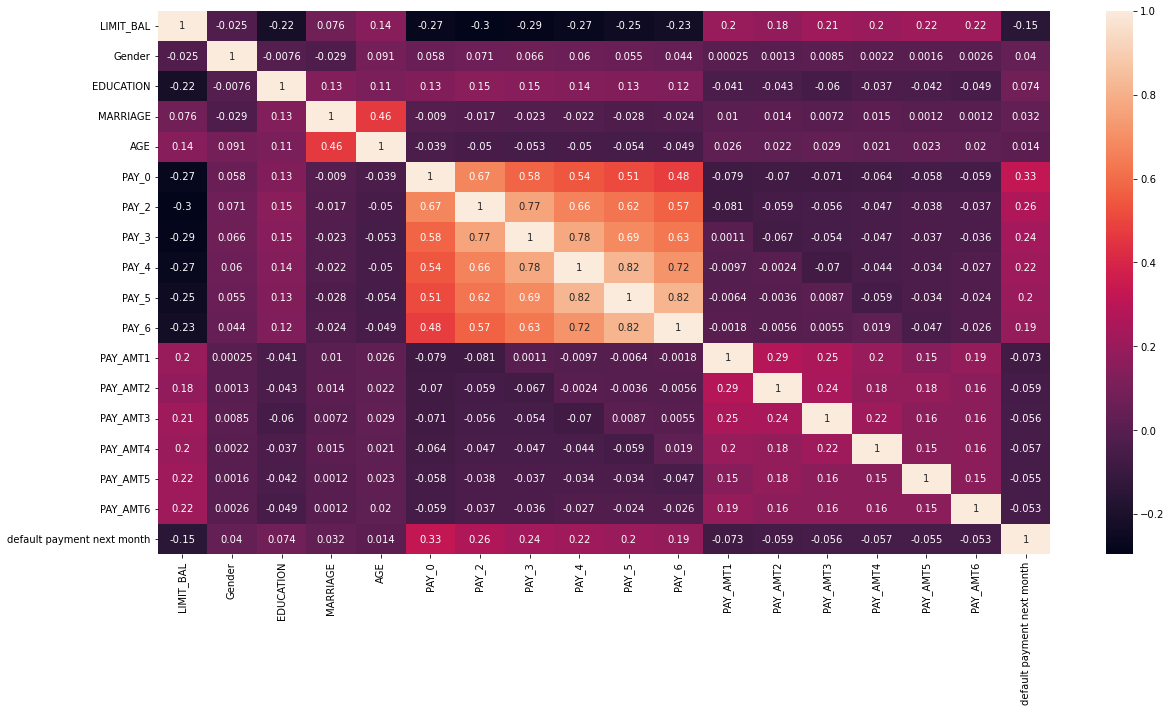

In [681]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<h2>Over Sampling

In [682]:
#Checking Balance of dataset

In [683]:
from collections import Counter

In [684]:
print(sorted((Counter(df['default payment next month']).items())))

[(0, 23286), (1, 6625)]


In [685]:
X=df
Y=df['default payment next month']

In [686]:
X.drop('default payment next month',axis=1,inplace=True)
X.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [687]:
#scaling the data
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X = pd.DataFrame(robust_scaler.fit_transform(X))

In [688]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)

X_resampled, y_resampled = oversample.fit_resample(X,Y)

print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 23286), (1, 23286)] (46572,)


<h1> Model Building

In [689]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree

In [690]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7,test_size=0.30, random_state=101)

### Logistic Regression

In [691]:
logistic_regression=LogisticRegression(n_jobs=1, random_state=15)
logistic_regression.fit(X_train,y_train)

#Evaluate the model
y_pred_test = logistic_regression.predict(X_test)


<AxesSubplot:>

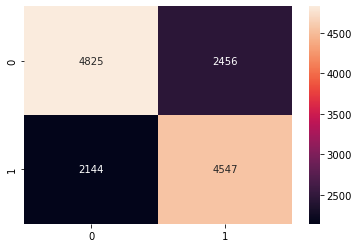

In [692]:
cnf_mat=confusion_matrix(y_pred_test, y_test)
sns.heatmap(cnf_mat,annot=True, fmt='d')

In [693]:
accuracy_score=accuracy_score(y_pred_test,y_test)
accuracy_score

0.6707701116518752

In [694]:
precision_score=precision_score(y_pred_test,y_test)
precision_score

0.6492931600742539

In [695]:
recall_score=recall_score(y_pred_test,y_test)
recall_score

0.6795695710656106

In [696]:
f1_score=f1_score(y_pred_test,y_test, average='macro')
f1_score

0.6706397218400171

In [697]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      6969
           1       0.68      0.65      0.66      7003

    accuracy                           0.67     13972
   macro avg       0.67      0.67      0.67     13972
weighted avg       0.67      0.67      0.67     13972



### Decision Tree Classifier

In [698]:
model_tree=DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)

<AxesSubplot:>

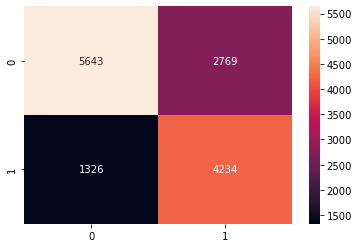

In [699]:
cnf_mat=confusion_matrix(y_pred, y_test)
sns.heatmap(cnf_mat,annot=True, fmt='d')

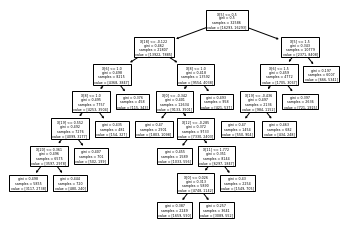

In [58]:
tree.plot_tree(model_tree)
plt.show()

In [59]:
df_features=df.drop('default payment next month',axis=1)

In [60]:
graph = Source( tree.export_graphviz(model_tree, out_file=None, feature_names=df_features.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [700]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      6969
           1       0.76      0.60      0.67      7003

    accuracy                           0.71     13972
   macro avg       0.72      0.71      0.70     13972
weighted avg       0.72      0.71      0.70     13972



### Random Forest

In [62]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [63]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
# Making predictions
predictions = rfc.predict(X_test)



In [65]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [66]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7022
           1       0.59      0.42      0.50      1962

    accuracy                           0.81      8984
   macro avg       0.72      0.67      0.69      8984
weighted avg       0.79      0.81      0.80      8984



In [67]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6453  569]
 [1129  833]]


In [68]:
print(accuracy_score(y_test,predictions))

0.8109973285841496


### Hyperparameter Tuning
The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.

- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [69]:
#Tuning Max Depth

In [70]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [71]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.606522,0.159202,0.058604,0.005309,2,{'max_depth': 2},0.705738,0.704465,0.707074,0.699095,...,0.705978,0.004643,4,0.705961,0.710883,0.707047,0.703096,0.706088,0.706615,0.002510
1,3.923426,0.554323,0.097008,0.013845,7,{'max_depth': 7},0.728444,0.726561,0.730091,0.728096,...,0.729301,0.002298,3,0.738837,0.741570,0.738233,0.739614,0.737581,0.739167,0.001376
2,5.879685,0.520313,0.161802,0.034121,12,{'max_depth': 12},0.794415,0.793463,0.810189,0.804204,...,0.801080,0.006315,2,0.844752,0.849438,0.846293,0.846906,0.844221,0.846322,0.001840
3,6.804643,0.167594,0.184399,0.009335,17,{'max_depth': 17},0.892912,0.893970,0.907166,0.912843,...,0.903241,0.008211,1,0.966434,0.963673,0.963520,0.962561,0.964402,0.964118,0.001298


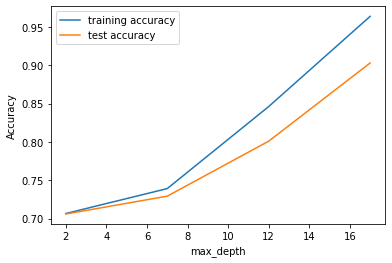

In [72]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
# Beyond a certain point, if we increase the max_depth, there is gap between training and test accuracy

### Tuning n_estimators

In [74]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [75]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.509292,0.264254,0.083195,0.019034,100,{'n_estimators': 100},0.714636,0.711984,0.716280,0.713825,...,0.714571,0.001587,4,0.717585,0.716138,0.718708,0.717787,0.716291,0.717302,0.000966
1,11.995752,0.514447,0.353396,0.033500,500,{'n_estimators': 500},0.717245,0.714439,0.716587,0.714132,...,0.716197,0.001691,1,0.717546,0.719015,0.718171,0.719667,0.717787,0.718437,0.000792
2,21.584828,0.683880,0.646607,0.072341,900,{'n_estimators': 900},0.715864,0.712444,0.717201,0.715053,...,0.715553,0.001757,3,0.717278,0.716905,0.718171,0.718631,0.717020,0.717601,0.000680
3,30.890482,0.732983,0.917079,0.063059,1300,{'n_estimators': 1300},0.715864,0.714286,0.717355,0.713825,...,0.716013,0.001844,2,0.717201,0.719437,0.718593,0.718056,0.717519,0.718161,0.000795


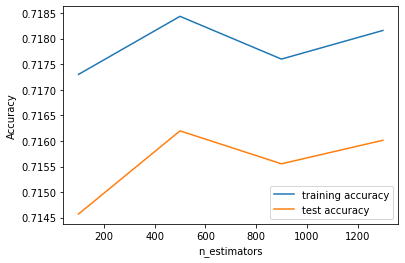

In [76]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
# We need to reduce the number of trees in random forest as test accuracy and train accuracy are far apart.

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [78]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [79]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.371037,0.156160,0.068915,0.002726,4,{'max_features': 4},0.715403,0.713672,0.716894,0.713825,...,0.715921,0.002271,1,0.717700,0.718861,0.717442,0.717442,0.717404,0.717770,0.000556
1,4.047244,0.190394,0.074610,0.011713,8,{'max_features': 8},0.710647,0.708762,0.709836,0.712137,...,0.711717,0.002955,2,0.713403,0.714910,0.712417,0.714604,0.714719,0.714011,0.000956
2,6.719843,0.208908,0.074999,0.009981,14,{'max_features': 14},0.709727,0.707841,0.708301,0.709836,...,0.710244,0.002748,3,0.710756,0.714565,0.711228,0.712839,0.712072,0.712292,0.001342
3,9.531603,0.403751,0.077195,0.015005,20,{'max_features': 20},0.711568,0.705539,0.710296,0.708608,...,0.710121,0.003013,4,0.712636,0.713299,0.712839,0.712762,0.711688,0.712645,0.000528
4,0.060309,0.004006,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


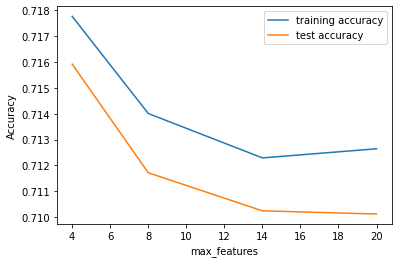

In [80]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The Accuracy decreased as we increase the Max Feature

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [81]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [82]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.318430,0.206263,0.113597,0.001736,100,{'min_samples_leaf': 100},0.730746,0.722879,0.729630,0.725487,...,0.728104,0.003375,1,0.738300,0.737466,0.733860,0.735970,0.735510,0.736221,0.001550
1,4.059281,0.207474,0.112335,0.014855,150,{'min_samples_leaf': 150},0.723688,0.721651,0.725334,0.724106,...,0.724053,0.001386,2,0.731894,0.732096,0.728758,0.729717,0.728797,0.730252,0.001465
2,3.711711,0.136451,0.108994,0.011497,200,{'min_samples_leaf': 200},0.723075,0.718122,0.722418,0.718736,...,0.721537,0.002723,3,0.725756,0.728260,0.726188,0.724385,0.725805,0.726079,0.001250
3,3.556659,0.113670,0.102595,0.006158,250,{'min_samples_leaf': 250},0.719546,0.715360,0.722725,0.717815,...,0.719665,0.002887,4,0.724490,0.724807,0.724193,0.722774,0.722467,0.723746,0.000944
4,3.346237,0.085351,0.101516,0.010276,300,{'min_samples_leaf': 300},0.719086,0.717815,0.718736,0.718275,...,0.719051,0.001224,5,0.722380,0.725459,0.721163,0.721278,0.720818,0.722220,0.001702


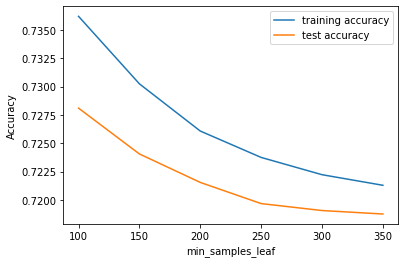

In [83]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
#As we increase the no of minimum samples leaf, the accuracy is decreasing

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [85]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [86]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.472447,0.145208,0.139922,0.011140,200,{'min_samples_split': 200},0.750077,0.738377,0.751419,0.745895,...,0.747100,0.004733,1,0.771214,0.768844,0.769688,0.766850,0.766044,0.768528,0.001879
1,5.353617,0.292702,0.126197,0.001598,250,{'min_samples_split': 250},0.746088,0.735615,0.742826,0.739604,...,0.741515,0.003600,2,0.762314,0.759484,0.756799,0.758832,0.755917,0.758669,0.002238
2,5.069905,0.151906,0.132001,0.010218,300,{'min_samples_split': 300},0.738724,0.731625,0.742213,0.735461,...,0.737218,0.003530,3,0.751343,0.752580,0.751352,0.751621,0.748322,0.751043,0.001434
3,4.994208,0.169424,0.126215,0.011556,350,{'min_samples_split': 350},0.736882,0.723492,0.736228,0.733313,...,0.732953,0.004886,4,0.746739,0.743949,0.743719,0.746902,0.743143,0.744890,0.001599
4,4.829175,0.168930,0.122595,0.009674,400,{'min_samples_split': 400},0.732433,0.723339,0.733159,0.731472,...,0.730682,0.003719,5,0.739796,0.742414,0.739384,0.741686,0.740381,0.740732,0.001145


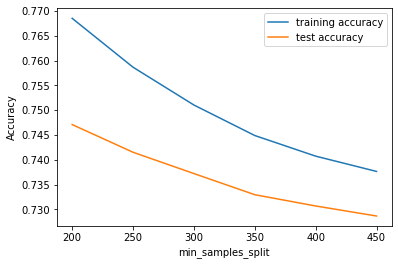

In [87]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [89]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [90]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7281040937826059 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [91]:
#Fitting the final model with the best parameters obtained from grid search.

In [92]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [93]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [94]:
# predict
predictions = rfc.predict(X_test)


In [95]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      7022
           1       0.48      0.62      0.54      1962

    accuracy                           0.77      8984
   macro avg       0.68      0.72      0.69      8984
weighted avg       0.80      0.77      0.78      8984



In [97]:
print(confusion_matrix(y_test,predictions))

[[5694 1328]
 [ 744 1218]]


## Train and Evaluate a Deep Learning Model

In [285]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu',input_shape=(23, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [286]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               12000     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 513,501
Trainable params: 513,501
Non-trainable params: 0
_________________________________________________________________


In [287]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [288]:
epochs_hist=model.fit(X_train,y_train, epochs = 20, batch_size = 20)

Epoch 1/20
1636/1636 [==============================] - 10s 6ms/step - loss: 0.5861 - accuracy: 0.6960
Epoch 2/20
1636/1636 [==============================] - 11s 6ms/step - loss: 0.5601 - accuracy: 0.7107
Epoch 3/20
1636/1636 [==============================] - 11s 7ms/step - loss: 0.5465 - accuracy: 0.7226
Epoch 4/20
1636/1636 [==============================] - 12s 7ms/step - loss: 0.5329 - accuracy: 0.7293
Epoch 5/20
1636/1636 [==============================] - 11s 7ms/step - loss: 0.5147 - accuracy: 0.7411
Epoch 6/20
1636/1636 [==============================] - 11s 7ms/step - loss: 0.4899 - accuracy: 0.7562
Epoch 7/20
1636/1636 [==============================] - 11s 6ms/step - loss: 0.4614 - accuracy: 0.7758
Epoch 8/20
1636/1636 [==============================] - 10s 6ms/step - loss: 0.4300 - accuracy: 0.7929
Epoch 9/20
1636/1636 [==============================] - 11s 7ms/step - loss: 0.3999 - accuracy: 0.8087
Epoch 10/20
1636/1636 [==============================] - 11s 7ms/step - l

In [289]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)


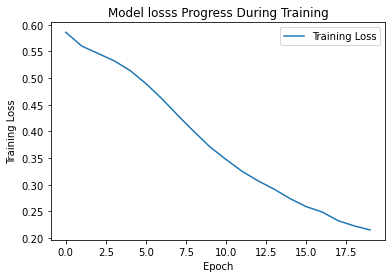

In [290]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model losss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

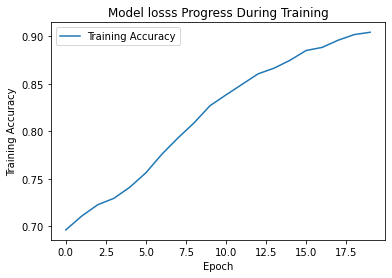

In [291]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model losss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

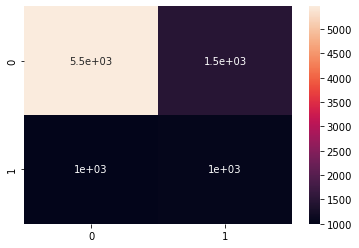

In [295]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [296]:
print(accuracy_score(y_test,y_pred))

0.7249832850456875


In [297]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6935
           1       0.41      0.51      0.46      2039

    accuracy                           0.72      8974
   macro avg       0.63      0.65      0.64      8974
weighted avg       0.75      0.72      0.73      8974



### Naive Bayes Classifier

In [108]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()

NBC.fit(X_train, y_train)

y_pred_test= NBC.predict(X_test)



<AxesSubplot:>

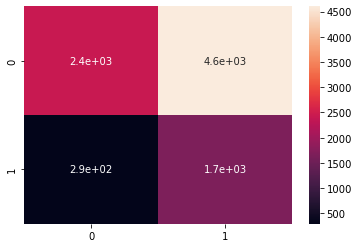

In [109]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True)

In [110]:
print(accuracy_score(y_test,y_pred_test))

0.45503116651825465


### Testing Model with Sample data

In [111]:
def sample_data_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will Default'
    else:
        return 'Will Pay'

In [112]:
pay = df[df['default payment next month']==0]

In [113]:
pay.head()

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,90000,1,1,1,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,1,1,2,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,2,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,2,2,1,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,2,2,1,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [114]:
from collections import OrderedDict
new_customer = OrderedDict([('LIMIT_BAL',4000),('Gender',2), ('EDUCATION',1),('MARRIAGE',2), ('AGE',25), ('PAY_0',23), ('PAY_2',35),
       ('PAY_3',26), ('PAY_4',27), ('PAY_5',28), ('PAY_6',29), ('BILL_AMT1',0), ('BILL_AMT2',0),
       ('BILL_AMT3',0), ('BILL_AMT4',0), ('BILL_AMT5',0), ('BILL_AMT6',0), ('PAY_AMT1',0),
       ('PAY_AMT2',0), ('PAY_AMT3',0), ('PAY_AMT4',4),('PAY_AMT5',6), ('PAY_AMT6',7)])
new_customer = pd.Series(new_customer)
sample_data_prediction(new_customer)

'Will Default'

<h2>Stratified K-fold Cross Validation with Pipeline

In [731]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [732]:
#Logisitc Regression

In [733]:
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(n_jobs=1, random_state=15))

In [734]:
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

In [735]:
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print("Logisitc Regression with cross validation and Pipeline")
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Logisitc Regression with cross validation and Pipeline
Fold:  1, Training/Test Split Distribution: [13054 13026], Accuracy: 0.668
Logisitc Regression with cross validation and Pipeline
Fold:  2, Training/Test Split Distribution: [13054 13026], Accuracy: 0.668
Logisitc Regression with cross validation and Pipeline
Fold:  3, Training/Test Split Distribution: [13054 13026], Accuracy: 0.661
Logisitc Regression with cross validation and Pipeline
Fold:  4, Training/Test Split Distribution: [13053 13027], Accuracy: 0.666
Logisitc Regression with cross validation and Pipeline
Fold:  5, Training/Test Split Distribution: [13053 13027], Accuracy: 0.665


Cross-Validation accuracy: 0.666 +/- 0.003


In [736]:
#Decision Tree

In [737]:
# Create an instance of Pipeline
pipeline_decisiontree = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_leaf_nodes=15, random_state=0))

In [738]:
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

In [739]:
for k, (train, test) in enumerate(kfold):
    pipeline_decisiontree.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline_decisiontree.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print("DecisionTree with cross validation and Pipeline")
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

DecisionTree with cross validation and Pipeline
Fold:  1, Training/Test Split Distribution: [13054 13026], Accuracy: 0.710
DecisionTree with cross validation and Pipeline
Fold:  2, Training/Test Split Distribution: [13054 13026], Accuracy: 0.701
DecisionTree with cross validation and Pipeline
Fold:  3, Training/Test Split Distribution: [13054 13026], Accuracy: 0.697
DecisionTree with cross validation and Pipeline
Fold:  4, Training/Test Split Distribution: [13053 13027], Accuracy: 0.701
DecisionTree with cross validation and Pipeline
Fold:  5, Training/Test Split Distribution: [13053 13027], Accuracy: 0.694


Cross-Validation accuracy: 0.701 +/- 0.006


In [740]:
#Random Forest

In [742]:
# Create an instance of Pipeline
pipeline_rfc = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100))

In [743]:
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

In [744]:
for k, (train, test) in enumerate(kfold):
    pipeline_rfc.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline_rfc.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print("DecisionTree with cross validation and Pipeline")
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

DecisionTree with cross validation and Pipeline
Fold:  1, Training/Test Split Distribution: [13054 13026], Accuracy: 0.725
DecisionTree with cross validation and Pipeline
Fold:  2, Training/Test Split Distribution: [13054 13026], Accuracy: 0.719
DecisionTree with cross validation and Pipeline
Fold:  3, Training/Test Split Distribution: [13054 13026], Accuracy: 0.724
DecisionTree with cross validation and Pipeline
Fold:  4, Training/Test Split Distribution: [13053 13027], Accuracy: 0.721
DecisionTree with cross validation and Pipeline
Fold:  5, Training/Test Split Distribution: [13053 13027], Accuracy: 0.716


Cross-Validation accuracy: 0.721 +/- 0.003


### Explainable AI

### Lime

In [115]:
from interpret.blackbox import LimeTabular

In [116]:
from interpret import show

In [117]:
#initialize lime for Tabular data
lime = LimeTabular(predict_fn=rfc.predict_proba, data=X_train, random_state=1)

In [118]:
#Get Local Explanations
lime_local = lime.explain_local(X_test[-20:],
                                y_test[-20:],
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/1718065458480/ -->

In [119]:
df_features=df.drop('default payment next month',axis=1)

In [120]:
df_features.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [121]:
rfc.feature_importances_

array([0.04973854, 0.00360357, 0.00139213, 0.00295047, 0.00949804,
       0.37871469, 0.16048124, 0.06945637, 0.03946983, 0.0197854 ,
       0.01312599, 0.03586349, 0.01922914, 0.01193157, 0.01094291,
       0.00943718, 0.00828588, 0.02400799, 0.03745147, 0.04828997,
       0.01740536, 0.01402637, 0.01491242])

<BarContainer object of 23 artists>

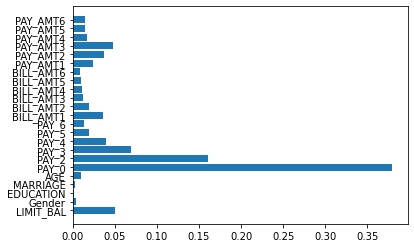

In [122]:
plt.barh(df_features.columns, rfc.feature_importances_)

### Shaply Value

In [123]:
import shap

In [124]:
explainer = shap.TreeExplainer(rfc)
#calculate shapley value for test data
start_index = 1
end_index = 23
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

array([[ 1.15789474e+00,  0.00000000e+00, -1.00000000e+00,
         1.00000000e+00,  2.30769231e-01, -1.00000000e+00,
        -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.94684638e-01,
        -6.17967187e-02, -5.11325877e-02, -1.73456356e-01,
        -1.67531382e-01, -1.47923939e-01,  3.82929873e+00,
         1.92723343e+00,  1.98956691e+00,  2.28679042e+00,
         2.24541012e+00, -3.86797318e-01],
       [ 2.63157895e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.30769231e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.19618010e+00,
         9.70848212e-01,  1.06631339e+00,  1.08648424e+00,
         1.03050057e+00,  9.96978380e-01,  4.75917145e-01,
         4.90153698e-01,  7.79570545e-01,  4.03551251e-01,
         3.96248844e-01,  5.15729758e-01],
       [ 1.15789474e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -1.5

In [125]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(22, 23)


[array([[ 4.41190371e-02,  2.28228896e-03, -3.00410663e-04,
         -1.75397462e-03,  3.54859491e-04,  9.63705842e-02,
          4.14197080e-02,  1.51971903e-02,  1.17381617e-02,
          5.67686926e-03,  5.02577386e-03,  1.76956127e-02,
          1.30925859e-02,  5.56173196e-03,  4.08747073e-03,
          6.62856864e-04,  3.79568440e-03,  1.80122911e-02,
          2.57888523e-02,  3.63193409e-02,  9.90493350e-03,
          1.00671580e-02, -1.19678538e-02],
        [ 4.54280661e-02, -5.32829821e-03,  5.89264779e-04,
          3.75033644e-03,  4.91876923e-05,  1.03029470e-01,
          3.66793225e-02,  1.49348924e-02,  8.33489454e-03,
          5.16117107e-03,  4.79499607e-03,  3.06207279e-02,
          1.21616859e-02,  2.13773294e-03,  1.66024633e-03,
          5.25652441e-03, -5.20145570e-04,  8.45799020e-03,
          2.09835547e-02,  3.11711398e-02,  1.03603212e-02,
          4.50585903e-03,  6.52033950e-03],
        [-9.41724635e-04,  4.01380857e-03, -2.28879588e-04,
          2.

In [126]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rfc.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values



The RF predicted: 0


In [ ]:
#Value below 0.5 indicates class 0, will not default, above 0.5 indicates class 1 means will default. All red points indicate the 
#features which are shifting the output towards class 1 and Blue points indicate, which are shifiting the output towards class 0.

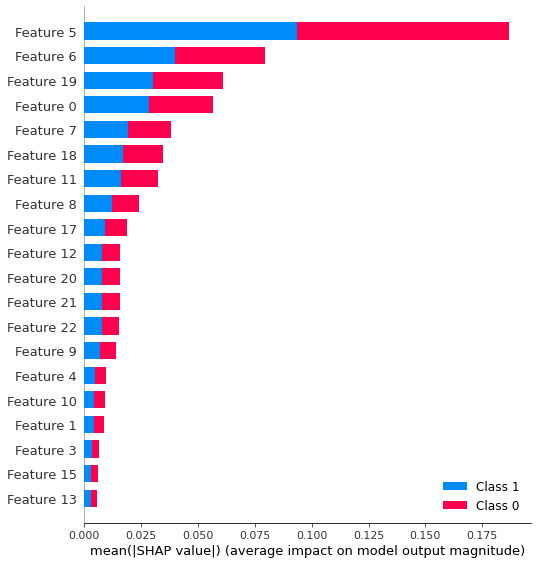

In [127]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)